In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import textwrap
from umap import UMAP
import datapane as dp
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
import scikitplot as skplt
from tqdm import tqdm

sns.set_style('whitegrid')
%matplotlib inline

from custom_functions import *

tqdm.pandas()

C:\Users\adshafi\Anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
dp.login(token="50d5a5b7877e2ca3156f5af760579e122df15734")

Connected successfully to https://datapane.com as adam1


In [3]:
X_train = pd.read_pickle('./pickled_data/X_train.pkl')
X_test = pd.read_pickle('./pickled_data/X_test.pkl')
y_train = pd.read_pickle('./pickled_data/y_train.pkl')
y_test = pd.read_pickle('./pickled_data/y_test.pkl')

### Bag of Words

C:\Users\adshafi\Anaconda3\lib\site-packages\umap\umap_.py:125: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 161 edges.
It has only fully disconnected 2 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


Publishing report and associated data - please wait..


C:\Users\adshafi\Anaconda3\lib\site-packages\datapane\client\api\report\core.py:249: UserWarning:

Passing visibility as a string is deprecated, use dp.Visibility enum instead.



Report successfully published at https://datapane.com/u/adam1/reports/bag-of-words-vectors/
Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/adam1/reports/bag-of-words-model/


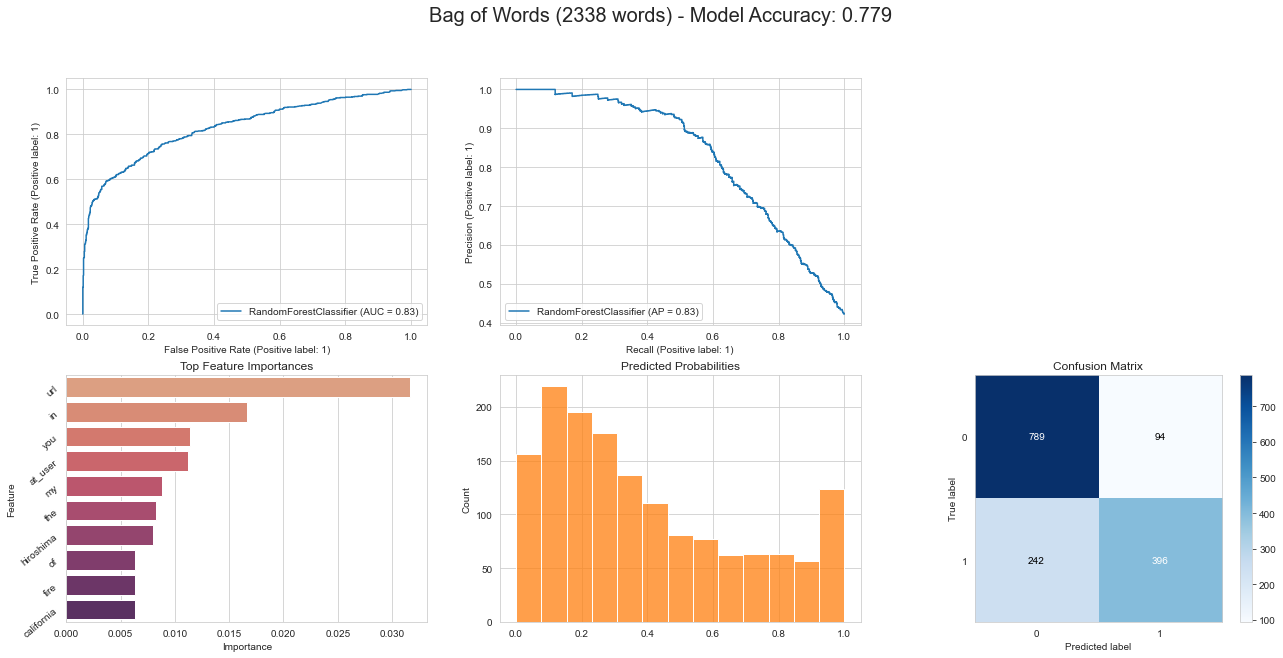

In [4]:
### Import from sklearn

from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the vectorizer object

bow = CountVectorizer(min_df=5,max_df=.99) # only take words that appear >5 times across the corpus

# vectorize the data

X_train_vec = bow.fit_transform(X_train['text'])
X_test_vec = bow.transform(X_test['text']) # make sure you don't fit on the test data!

cols = bow.get_feature_names()

# to get a dataframe

X_train_df = pd.DataFrame(X_train_vec.toarray(),columns = cols)

# fit a random forest model

model = RandomForestClassifier(n_estimators=500, n_jobs=8)
model.fit(X_train_vec,y_train)
model_plot = model_summary_plot(model, X_test_vec, y_test, cols,
                                f'Bag of Words ({X_train_df.shape[1]} words)',
                                model.feature_importances_,n=10)


dp_publish(umap_plot(X_train, y_train, X_train_df),'Bag of Words Vectors')

dp_publish(model_plot,'Bag of Words Model')

### Bag of Words + ngrams

C:\Users\adshafi\Anaconda3\lib\site-packages\umap\umap_.py:125: UserWarning:

A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 200 edges.
It has only fully disconnected 2 vertices.
Use umap.utils.disconnected_vertices() to identify them.



Publishing report and associated data - please wait..


C:\Users\adshafi\Anaconda3\lib\site-packages\datapane\client\api\report\core.py:249: UserWarning:

Passing visibility as a string is deprecated, use dp.Visibility enum instead.



Report successfully published at https://datapane.com/u/adam1/reports/bag-of-words-ngrams-vectors/
Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/adam1/reports/bag-of-words-ngrams-model/


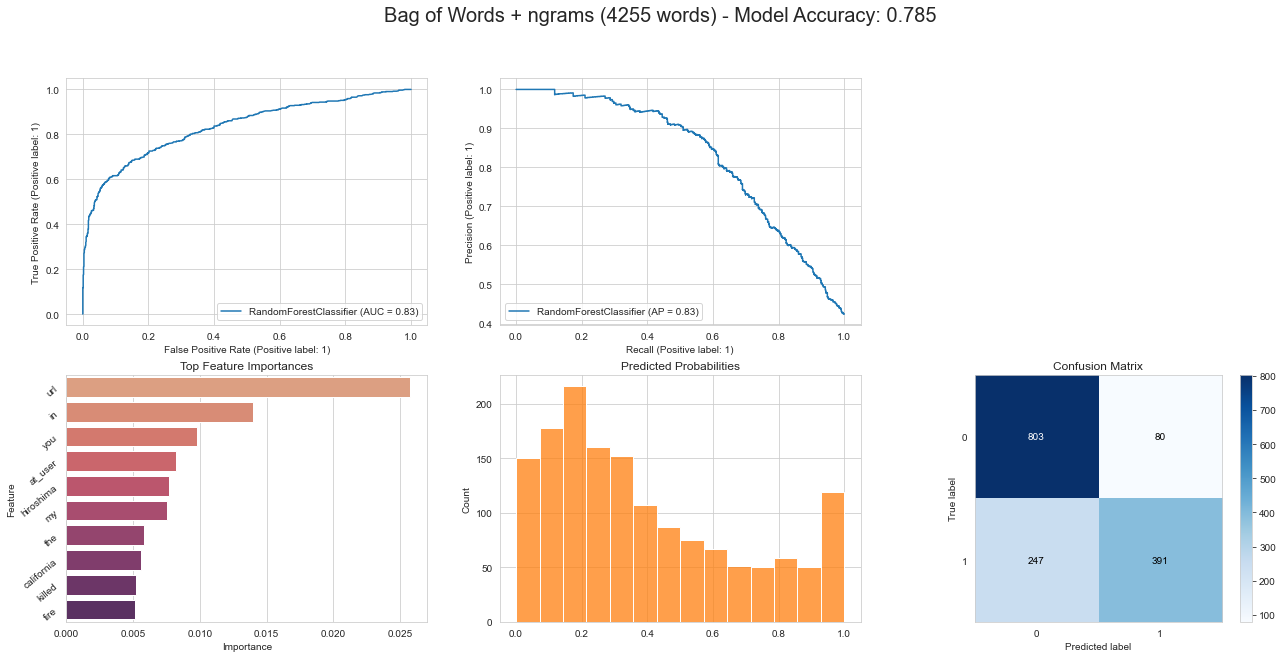

In [5]:
### Import from sklearn

from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the vectorizer object

bow = CountVectorizer(min_df=5,max_df=.99, ngram_range=(1, 2)) # only take words that appear >5 times across the corpus

# vectorize the data

X_train_vec = bow.fit_transform(X_train['text'])
X_test_vec = bow.transform(X_test['text']) # make sure you don't fit on the test data!

cols = bow.get_feature_names()

# to get a dataframe

X_train_df = pd.DataFrame(X_train_vec.toarray(),columns = cols)

# fit a random forest model

model = RandomForestClassifier(n_estimators=500, n_jobs=8)
model.fit(X_train_vec,y_train)
model_plot = model_summary_plot(model, X_test_vec, y_test, cols,
                                f'Bag of Words + ngrams ({X_train_df.shape[1]} words)',
                                model.feature_importances_,n=10)


dp_publish(umap_plot(X_train, y_train, X_train_df),'Bag of Words + ngrams Vectors')

dp_publish(model_plot,'Bag of Words + ngrams Model')

### TF-IDF With ngrams

C:\Users\adshafi\Anaconda3\lib\site-packages\umap\umap_.py:125: UserWarning:

A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 48 edges.
It has only fully disconnected 1 vertices.
Use umap.utils.disconnected_vertices() to identify them.



Publishing report and associated data - please wait..


C:\Users\adshafi\Anaconda3\lib\site-packages\datapane\client\api\report\core.py:249: UserWarning:

Passing visibility as a string is deprecated, use dp.Visibility enum instead.



Report successfully published at https://datapane.com/u/adam1/reports/tf-idf-ngrams-vectors/
Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/adam1/reports/tf-idf-ngrams-model/


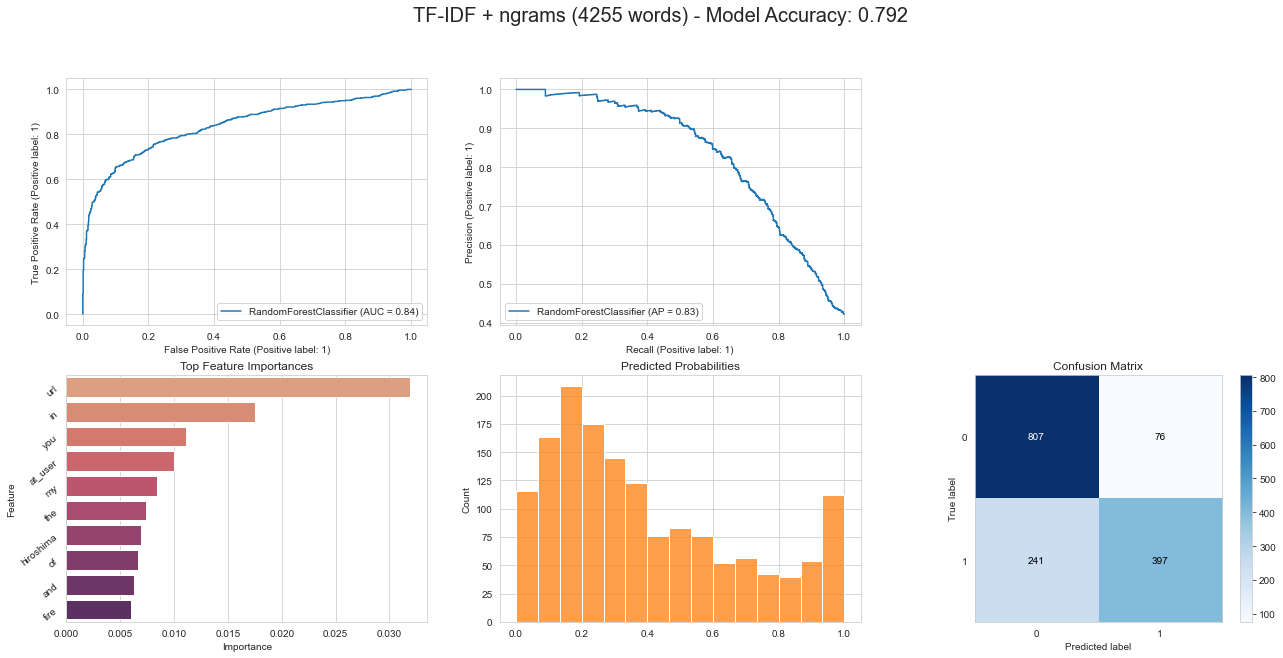

In [6]:
### Import from sklearn

from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the vectorizer object

tfidf = TfidfVectorizer(min_df=5,max_df=.99,ngram_range=(1, 2)) # only take words that appear >5 times across the corpus

# vectorize the data

X_train_vec = tfidf.fit_transform(X_train['text'])
X_test_vec = tfidf.transform(X_test['text']) # make sure you don't fit on the test data!

cols = tfidf.get_feature_names()

# to get a dataframe

X_train_df = pd.DataFrame(X_train_vec.toarray(),columns = cols)

# fit a random forest model

model = RandomForestClassifier(n_estimators=500, n_jobs=8)
model.fit(X_train_vec,y_train)
model_plot = model_summary_plot(model, X_test_vec, y_test, cols,
                                f'TF-IDF + ngrams ({X_train_df.shape[1]} words)',
                                model.feature_importances_,n=10)


dp_publish(umap_plot(X_train, y_train, X_train_df),'TF-IDF + ngrams Vectors')

dp_publish(model_plot,'TF-IDF + ngrams Model')